In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import time

import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision

import pytorch_lightning as pl

import sklearn
import functools
import operator

import sys

import optuna

sys.path.insert(1,"/home/sbulusu/qcd_ml/neural_networks/libs/")

#import lat_dataset_load_new_lightning
import open_worm_lat_dataset_load_new_lightning_dat
#import struct_torch_net_class_lightning
import custom_torch_net_class_lightning

import utils
import circ_padding
import misc_modules

from tqdm.notebook import tqdm

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Utilizing CUDA")
else:
    device = torch.device("cpu")
    print("Utilizing CPU")
    

Utilizing CUDA


In [3]:
random_seed = 42
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.enabled = False
torch.backends.cudnn.deterministic = True

In [4]:
"""
Load Data
"""
#conf_file_dir = "/media/data/sbulusu/datasets/complexworm/dat_files/"
conf_file_dir = "/media/data/sbulusu/datasets/complexworm/dat_files/"
file_format_list = ["Multi_lattice_open_worms/open_configs-50-2*.dat",
                    "Multi_lattice_closed_worms/configs-50-2*.dat"
                   ]

#label_names = ["n", "phi2"]
label_names = []
labels_in_file_name = ["nt", "nx", "eta", "lambda", "mu"]

dataset = open_worm_lat_dataset_load_new_lightning_dat.kl_dataset(conf_file_dir, file_format_list,
                                                              label_names, labels_in_file_name,
                                                              transform=None)

found file 60 paths:
['/media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.945.dat', '/media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.915.dat', '/media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.955.dat', '/media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.965.dat', '/media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.975.dat', '/media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.990.dat', '/media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.980.dat', '/media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.020.dat', '/media/data/sbulusu/datas

Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.945.dat
['open_configs', '50', '2', '4.010', '1.000', '0.945']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.945.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.945.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs


first example loaded:
{'conf': tensor([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],

        [[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
           1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0],
         [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
           1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0]],

        [[ 0,  0,  0,  0,  0,  0,  0,  0,


Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.955.dat
['open_configs', '50', '2', '4.010', '1.000', '0.955']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.955.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.955.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.965.dat
['open_configs', '50', '2', '4.010', '1.000', '0.965']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.965.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.965.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.975.dat
['open_configs', '50', '2', '4.010', '1.000', '0.975']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.975.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.975.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.990.dat
['open_configs', '50', '2', '4.010', '1.000', '0.990']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.990.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.990.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.980.dat
['open_configs', '50', '2', '4.010', '1.000', '0.980']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.980.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.980.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.020.dat
['open_configs', '50', '2', '4.010', '1.000', '1.020']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.020.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.020.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.040.dat
['open_configs', '50', '2', '4.010', '1.000', '1.040']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.040.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.040.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.985.dat
['open_configs', '50', '2', '4.010', '1.000', '0.985']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.985.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.985.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.010.dat
['open_configs', '50', '2', '4.010', '1.000', '1.010']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.010.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.010.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.960.dat
['open_configs', '50', '2', '4.010', '1.000', '0.960']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.960.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.960.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.025.dat
['open_configs', '50', '2', '4.010', '1.000', '1.025']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.025.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.025.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.920.dat
['open_configs', '50', '2', '4.010', '1.000', '0.920']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.920.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.920.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.015.dat
['open_configs', '50', '2', '4.010', '1.000', '1.015']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.015.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.015.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.050.dat
['open_configs', '50', '2', '4.010', '1.000', '1.050']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.050.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.050.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.035.dat
['open_configs', '50', '2', '4.010', '1.000', '1.035']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.035.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.035.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.995.dat
['open_configs', '50', '2', '4.010', '1.000', '0.995']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.995.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.995.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.970.dat
['open_configs', '50', '2', '4.010', '1.000', '0.970']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.970.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.970.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.935.dat
['open_configs', '50', '2', '4.010', '1.000', '0.935']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.935.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.935.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.005.dat
['open_configs', '50', '2', '4.010', '1.000', '1.005']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.005.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.005.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.940.dat
['open_configs', '50', '2', '4.010', '1.000', '0.940']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.940.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.940.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.030.dat
['open_configs', '50', '2', '4.010', '1.000', '1.030']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.030.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.030.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.930.dat
['open_configs', '50', '2', '4.010', '1.000', '0.930']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.930.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.930.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.000.dat
['open_configs', '50', '2', '4.010', '1.000', '1.000']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.000.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.000.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.045.dat
['open_configs', '50', '2', '4.010', '1.000', '1.045']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.045.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-1.045.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.910.dat
['open_configs', '50', '2', '4.010', '1.000', '0.910']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.910.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.910.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.925.dat
['open_configs', '50', '2', '4.010', '1.000', '0.925']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.925.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.925.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.950.dat
['open_configs', '50', '2', '4.010', '1.000', '0.950']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.950.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_open_worms/open_configs-50-2-4.010-1.000-0.950.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.500.dat
['configs', '50', '2', '4.010', '1.000', '1.500']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.500.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.500.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.995.dat
['configs', '50', '2', '4.010', '1.000', '0.995']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.995.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.995.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.050.dat
['configs', '50', '2', '4.010', '1.000', '1.050']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.050.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.050.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.005.dat
['configs', '50', '2', '4.010', '1.000', '1.005']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.005.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.005.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.990.dat
['configs', '50', '2', '4.010', '1.000', '0.990']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.990.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.990.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.030.dat
['configs', '50', '2', '4.010', '1.000', '1.030']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.030.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.030.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.930.dat
['configs', '50', '2', '4.010', '1.000', '0.930']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.930.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.930.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.970.dat
['configs', '50', '2', '4.010', '1.000', '0.970']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.970.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.970.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.015.dat
['configs', '50', '2', '4.010', '1.000', '1.015']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.015.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.015.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.950.dat
['configs', '50', '2', '4.010', '1.000', '0.950']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.950.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.950.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.925.dat
['configs', '50', '2', '4.010', '1.000', '0.925']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.925.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.925.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.975.dat
['configs', '50', '2', '4.010', '1.000', '0.975']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.975.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.975.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.040.dat
['configs', '50', '2', '4.010', '1.000', '1.040']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.040.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.040.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.965.dat
['configs', '50', '2', '4.010', '1.000', '0.965']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.965.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.965.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.035.dat
['configs', '50', '2', '4.010', '1.000', '1.035']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.035.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.035.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.980.dat
['configs', '50', '2', '4.010', '1.000', '0.980']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.980.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.980.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.045.dat
['configs', '50', '2', '4.010', '1.000', '1.045']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.045.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.045.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.940.dat
['configs', '50', '2', '4.010', '1.000', '0.940']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.940.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.940.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.915.dat
['configs', '50', '2', '4.010', '1.000', '0.915']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.915.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.915.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.025.dat
['configs', '50', '2', '4.010', '1.000', '1.025']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.025.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.025.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.985.dat
['configs', '50', '2', '4.010', '1.000', '0.985']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.985.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.985.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.945.dat
['configs', '50', '2', '4.010', '1.000', '0.945']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.945.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.945.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.960.dat
['configs', '50', '2', '4.010', '1.000', '0.960']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.960.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.960.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.020.dat
['configs', '50', '2', '4.010', '1.000', '1.020']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.020.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.020.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.920.dat
['configs', '50', '2', '4.010', '1.000', '0.920']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.920.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.920.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.010.dat
['configs', '50', '2', '4.010', '1.000', '1.010']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.010.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.010.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.935.dat
['configs', '50', '2', '4.010', '1.000', '0.935']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.935.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.935.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.955.dat
['configs', '50', '2', '4.010', '1.000', '0.955']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.955.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.955.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-2.000.dat
['configs', '50', '2', '4.010', '1.000', '2.000']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-2.000.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-2.000.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.000.dat
['configs', '50', '2', '4.010', '1.000', '1.000']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.000.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-1.000.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs



Processing conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.910.dat
['configs', '50', '2', '4.010', '1.000', '0.910']
loaded file name labels ['nt', 'nx', 'eta', 'lambda', 'mu']
First read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.910.dat with size :torch.Size([4000, 4, 2, 50])
Read conf file /media/data/sbulusu/datasets/complexworm/dat_files/Multi_lattice_closed_worms/configs-50-2-4.010-1.000-0.910.dat with size :torch.Size([4000, 4, 2, 50])
Loading 4000 confs




last example loaded:
{'conf': tensor([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],

        [[ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0]],

        [[ 0,  0,  0,  0,  1,  0,  0,  0

In [5]:
#target_attributes = ["mu"]
#output_attributes = ["mu"]
#target_attributes = ["n"]
#output_attributes = ["n"]
#target_attributes = ["phi2"]
#output_attributes = ["phi2"]
#target_attributes = ["phase"]
#output_attributes = ["order","disorder"]
#output_attributes = ["phase_p"]

target_attributes = ["open"]
output_attributes = target_attributes

#dataset.train_label_names = ["phase"]
#dataset.train_label_names = ["n"]
#dataset.train_label_names = ["phi2"]

dataset.train_label_names = target_attributes

In [6]:
print(dataset[1])

(tensor([[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]],

        [[ 1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0],
         [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
           0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
           1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0]],

        [[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  

In [7]:
sample_conf, sample_label = dataset[0]
print(sample_conf.shape)

torch.Size([4, 2, 50])


tensor([1.])


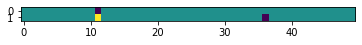

In [8]:
#k_lat_links = sample_conf[0].cpu()
#l_lat_links = sample_conf[1].cpu()
l_lat_links = sample_conf.cpu()
plt.imshow(l_lat_links[0])

print(sample_label)

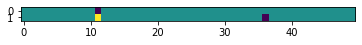

In [9]:
plt.imshow(l_lat_links[0])

In [10]:
"""Take specific example indices with particular labels"""

filter_label_names = ["mu"]
label_values = [[0.910, 1.050]]

filtered_train_indices, remaining_indices = dataset.filter_indices_label_vals(filter_label_names, label_values, remove=False)

Filtering indices with respect to labels ['mu'], remove = False


In [11]:
train_indices = filtered_train_indices
len(train_indices)

16000

In [12]:
len(remaining_indices)

224000

In [13]:
val_test_ratio = [0.2,0.8]
val_indices, test_indices = utils.split_shuffle_indices(remaining_indices, fractions=val_test_ratio, shuffle=True, random_seed=random_seed, log_file=None)

splitting into fraction [0.2, 0.8]
number of indices: 224000
slicing from 0 to 44800
slicing from 44800 to 224000


In [14]:
split_indices= {"train": train_indices, "val":val_indices, "test":test_indices}

In [15]:
print(len(split_indices["train"]))
print(len(split_indices["val"]))
print(len(split_indices["test"]))

16000
44800
179200


In [16]:
"""Manually set network structure"""
"""
    This list can be loaded into the constructor of the Net neural network class, to automatically generate the network structure
    type = pointer to the layer function'
    layer_pars = parameters which must be given to the layer function in order to initialize it
    act_func = activation function to be applied directly after feeding to the corresponding layer
    dropout = certain neurons cna be dropped out if specified
"""

cnn_struct = []
first_input = dataset[0][0]
input_size = list(first_input.size())
#print(f"input size {input_size}")
#target_size = len(target_attributes)
#print(f"target size {target_size}")
#output_size = target_size
output_size = len(target_attributes)

i0 = input_size[0]

#[ [[in_channels, out_channels], [kernel_size], [stride], [padding]], ... ]

o_chan = 64
kernel_pars = [
    [[i0,64],[2,2],[1,1],[0,1,1]],
    [[64,64],[2,2],[1,1],[0,1,1]],
    [[64,o_chan],[2,2],[1,1],[0,1,1]],
]





#cnn_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
for i, kernel_par in enumerate(kernel_pars):
    layer_type = nn.Conv2d
    if np.any(kernel_par[3] != 0):
        #cnn_struct.append( {"type": circ_padding.CircularPadding, "layer_pars": {"padding": kernel_par[3]}} )
        cnn_struct.append( {"type": circ_padding.AsymmetricCircularPadding, "layer_pars": {"padding": kernel_par[3]}} )
    cnn_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "bias": True}} )
    #cnn_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding_mode": "circular", "padding": kernel_par[3], "bias": True}} )
    #cnn_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding_mode": "circular", "padding": kernel_par[3], "bias": False}} )
    #cnn_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
    #cnn_struct.append( {"type": layer_type, "layer_pars": {"in_channels": kernel_par[0][0], "out_channels": kernel_par[0][1], "kernel_size": kernel_par[1], "stride": kernel_par[2], "padding": kernel_par[3], "bias": True}} )
    cnn_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
      
    
cnn_struct.append( {"type": nn.AdaptiveAvgPool2d, "layer_pars": {"output_size": [1,1]}} )


conv_sizes = utils.calc_layer_sizes(input_size, cnn_struct)
print(conv_sizes)

custom layer operation not defined, assuming previous layer_size for
<class 'torch.nn.modules.activation.ReLU'>
custom layer operation not defined, assuming previous layer_size for
<class 'torch.nn.modules.activation.ReLU'>
custom layer operation not defined, assuming previous layer_size for
<class 'torch.nn.modules.activation.ReLU'>
[[4, 2, 50], [4, 3, 51], [64, 2, 50], [64, 2, 50], [64, 3, 51], [64, 2, 50], [64, 2, 50], [64, 3, 51], [64, 2, 50], [64, 2, 50], [64, 1, 1]]


In [17]:
dense_struct = []

fc_input_size = np.product(conv_sizes[-1])

print(fc_input_size)

#fc_conv_size = conv_sizes[-1]
#avg_pool_kernel_size = fc_conv_size[-2:]
#dense_struct.append( {"type": nn.AvgPool2d, "layer_pars": {"kernel_size": [2,2], "stride": [2,2], "padding": 0}} )

dense_struct.append( {"type": misc_modules.Reshape, "layer_pars": {"new_shape": [o_chan]}} )
#dense_struct.append( {"type": misc_modules.Mean, "layer_pars": {"dim": 0}} )
dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": o_chan, "out_features":o_chan}} )
cnn_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": o_chan, "out_features":1}} )
dense_struct.append( {"type": nn.Sigmoid, "layer_pars": {}} )


#dense_struct.append( {"type": nn.Flatten, "layer_pars": {"start_dim": 1}} )
#fixed_net_struct.append( {"type": utils.Reshape, "layer_pars": {"new_shape": [fc_input_size]}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features":64}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features":32}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features":16}} )

#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": fc_input_size, "out_features":2}} )
#dense_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 64, "out_features": 32}} )
#dense_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 32, "out_features": 16}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 16, "out_features":8}} )
#dense_struct.append( {"type": nn.ReLU, "layer_pars": {}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 16, "out_features": 2}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 8, "out_features": 2}} )
#dense_struct.append( {"type": nn.Linear, "layer_pars": {"in_features": 4, "out_features": 2}} )

"""
HYPERPARAMETERS
"""
epochs = 200

"""create list of parameters manually"""

hyper_parameters = {}
hyper_parameters["name"] = "CustomNet"

#hyper_parameters["net_struct"] = net_struct
hyper_parameters["cnn_struct"] = cnn_struct
hyper_parameters["classifier1_struct"] = dense_struct
hyper_parameters["input_size"] = [output_size]
hyper_parameters["fc_input_size"] = fc_input_size
hyper_parameters["output_size"] = [output_size]
#hyper_parameters["device"] = device

#hyper_parameters["dataset"] = dataset

hyper_parameters["random_seed"] = random_seed
hyper_parameters["epochs"] = epochs

hyper_parameters["bs"] = 1 
hyper_parameters["lr"] = 0.0001

#hyper_parameters["loss"] = nn.CrossEntropyLoss
hyper_parameters["loss"] = nn.BCELoss
#hyper_parameters["loss"] = nn.MSELoss
hyper_parameters["loss_kwargs"] = {}
hyper_parameters["optimizer"] = optim.AdamW
hyper_parameters["optimizer_kwargs"] = {"weight_decay" : 0.01}

64


In [18]:
#test_model = custom_torch_net_class_lightning.CustomNet(hyper_parameters)
#test_conf, test_label = dataset[0]
#test_batch_size = tuple(np.concatenate(([1],dataset_output_size)))
#test_conf_batch = torch.zeros(test_batch_size)
#test_conf_batch[0] = test_conf
#print(test_conf_batch.size())

#output = test_model(test_conf_batch)
#print(output)
#print(test_label)

In [19]:
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning import Trainer, Callback

# copy class from https://github.com/optuna/optuna/blob/25f578c6d853a396f5c3b8817ace1ff74e6c7300/optuna/integration/pytorch_lightning.py
class PyTorchLightningPruningCallback(EarlyStopping):

    def __init__(self, trial, monitor):
        # type: (optuna.trial.Trial, str) -> None

        super(PyTorchLightningPruningCallback, self).__init__(monitor=monitor)

        self._trial = trial
        self._monitor = monitor

    def on_epoch_end(self, trainer, pl_module):
        # type: (Trainer, LightningModule) -> None
        logs = trainer.callback_metrics
        epoch = pl_module.current_epoch
        current_score = logs.get(self._monitor)
        if current_score is None:
            return
        self._trial.report(current_score, step=epoch)
        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)

#at the end of validation, save the validation loss via this callback class
class MetricsCallback(pl.Callback):
    """PyTorch Lightning metric callback"""

    def __init__(self):
        super().__init__()
        self.metrics = []

    def on_validation_end(self, trainer, pl_module):
        self.metrics.append(trainer.callback_metrics)

In [20]:
lr_min = 10**(-7)
lr_max = 10**(-4)
#lr_max = 10**(-3)

bs_categories = [16, 32, 64, 128]

#objective to optimize with optuna
def objective(trial):
    #create ranges for adjustable parameters
    lr_range = trial.suggest_loguniform("lr", lr_min, lr_max)
    
    bs_range = trial.suggest_categorical("bs", bs_categories)
    
    
    #add them to all hyper parameters
    hyper_parameters["lr"] = lr_range
    #hyper_parameters["bs"] = 32
    hyper_parameters["bs"] = bs_range
    
    #create network instance
    model = custom_torch_net_class_lightning.CustomNet(hyper_parameters)
    
    hparams = model.hparams
    
    model.prepare_dataset_splits(dataset, split_indices)

    model.to(device)

    #train_loader = model.train_dataloader()
    #val_loader = model.val_dataloader()
    
    model.configure_loss()
    
    #create checkpoint callback function to save best model based on metric (monitor)
    checkpoint_callback = ModelCheckpoint(
        filepath= os.getcwd() + '/pl_checkpoints/{}-{:03d}'.format(model.hparams['name'], trial.number) + '-{epoch:03d}-{val_loss:.5E}',
        save_top_k=1,
        verbose=False,
        monitor='val_loss',
        mode='min',
        prefix=''
    )
    
    #create callback function to save validation loss
    metrics_callback = MetricsCallback()
    
    #logging with TensorBoard
    tb_logger = TensorBoardLogger("lightning_logs", name=hparams['name'])
    
    #lightning trainer instance
    #with callback functions for checkpoints, validation loss and early stopping
    trainer = pl.Trainer(
        logger=tb_logger,
        gpus=1,
        max_epochs=hyper_parameters["epochs"],
        checkpoint_callback=checkpoint_callback,
        callbacks=[metrics_callback],
        early_stop_callback=PyTorchLightningPruningCallback(trial, monitor="val_loss")
    )
    
    #training procedure
    trainer.fit(model)
    
    # collect all val_losses and return minimum (or average)
    val_losses = []
    for d in metrics_callback.metrics:
        if 'val_loss' in d:
            val_losses.append(d['val_loss'])
            
    target_metric = np.min(val_losses)
    
    return target_metric

In [21]:
n_trials = 50
#n_trials = 20
study = optuna.create_study()
study.optimize(objective, n_trials=n_trials)

INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d         | 0     
12 | cnn.layers.10   | ReLU                      | 0     
13 | dense1          | Net         

/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/pytorch_lightning/utilities/warnings.py:18: RuntimeWarning: Displayed epoch numbers in the progress bar start from "1" until v0.6.x, but will start from "0" in v0.8.0.
  warnings.warn(*args, **kwargs)


/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type AsymmetricCircularPadding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/sbulusu/anaconda3/envs/ml/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type AdaptiveAvgPool2d. It won't be checked fo

[I 2020-06-11 18:00:24,176] Finished trial#0 with value: 0.9093941450119019 with parameters: {'lr': 2.222939686127596e-07, 'bs': 64}. Best is trial#0 with value: 0.9093941450119019.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU

[I 2020-06-11 18:34:01,445] Finished trial#1 with value: 0.8646796345710754 with parameters: {'lr': 4.86937801212446e-06, 'bs': 32}. Best is trial#1 with value: 0.8646796345710754.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU 

[I 2020-06-11 18:56:39,941] Finished trial#2 with value: 1.2932357788085938 with parameters: {'lr': 3.917828278252555e-06, 'bs': 64}. Best is trial#1 with value: 0.8646796345710754.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU

[I 2020-06-11 19:49:15,268] Finished trial#3 with value: 0.03698612377047539 with parameters: {'lr': 7.997160135530374e-05, 'bs': 16}. Best is trial#3 with value: 0.03698612377047539.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | Re

[I 2020-06-11 20:07:31,130] Finished trial#4 with value: 0.9282660484313965 with parameters: {'lr': 6.086522278172993e-07, 'bs': 128}. Best is trial#3 with value: 0.03698612377047539.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | Re

[I 2020-06-11 20:07:45,317] Setting status of trial#5 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d      

[I 2020-06-11 20:07:56,847] Setting status of trial#6 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d      

[I 2020-06-11 20:08:11,191] Setting status of trial#7 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d      

[I 2020-06-11 20:30:57,613] Finished trial#8 with value: 0.7595775127410889 with parameters: {'lr': 1.4508196266110474e-07, 'bs': 64}. Best is trial#3 with value: 0.03698612377047539.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | Re

[I 2020-06-11 20:49:22,466] Finished trial#9 with value: 1.2774029970169067 with parameters: {'lr': 4.713186917689971e-06, 'bs': 128}. Best is trial#3 with value: 0.03698612377047539.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | Re

[I 2020-06-11 20:49:54,540] Setting status of trial#10 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d     

[I 2020-06-11 21:42:52,943] Finished trial#11 with value: 0.8744757771492004 with parameters: {'lr': 1.1966505646293453e-07, 'bs': 16}. Best is trial#3 with value: 0.03698612377047539.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | R

[I 2020-06-11 21:43:25,233] Setting status of trial#12 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d     

[I 2020-06-11 22:17:29,617] Finished trial#13 with value: 1.239370584487915 with parameters: {'lr': 1.0135839388519812e-06, 'bs': 32}. Best is trial#3 with value: 0.03698612377047539.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | Re

[I 2020-06-11 22:18:01,799] Setting status of trial#14 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d     

[I 2020-06-11 22:18:34,276] Setting status of trial#15 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d     

[I 2020-06-11 22:18:49,104] Setting status of trial#16 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d     

[I 2020-06-11 22:19:10,468] Setting status of trial#17 as TrialState.PRUNED. Trial was pruned at epoch 1.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | ReLU                      | 0     
11 | cnn.layers.9    | AdaptiveAvgPool2d     

[I 2020-06-11 22:42:04,672] Finished trial#18 with value: 0.9534876942634583 with parameters: {'lr': 4.1028226326290415e-07, 'bs': 64}. Best is trial#3 with value: 0.03698612377047539.
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
INFO:lightning:
   | Name            | Type                      | Params
----------------------------------------------------------
0  | cnn             | Net                       | 33 K  
1  | cnn.layers      | ModuleList                | 33 K  
2  | cnn.layers.0    | AsymmetricCircularPadding | 0     
3  | cnn.layers.1    | Conv2d                    | 1 K   
4  | cnn.layers.2    | ReLU                      | 0     
5  | cnn.layers.3    | AsymmetricCircularPadding | 0     
6  | cnn.layers.4    | Conv2d                    | 16 K  
7  | cnn.layers.5    | ReLU                      | 0     
8  | cnn.layers.6    | AsymmetricCircularPadding | 0     
9  | cnn.layers.7    | Conv2d                    | 16 K  
10 | cnn.layers.8    | R

[I 2020-06-11 22:42:36,707] Setting status of trial#19 as TrialState.PRUNED. Trial was pruned at epoch 1.


In [22]:
study.best_params

{'lr': 7.997160135530374e-05, 'bs': 16}

In [23]:
study.best_trial

FrozenTrial(number=3, value=0.03698612377047539, datetime_start=datetime.datetime(2020, 6, 11, 18, 56, 39, 945901), datetime_complete=datetime.datetime(2020, 6, 11, 19, 49, 15, 266537), params={'lr': 7.997160135530374e-05, 'bs': 16}, distributions={'lr': LogUniformDistribution(high=0.0001, low=1e-07), 'bs': CategoricalDistribution(choices=(16, 32, 64, 128))}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.90497887134552, 1: 1.2433934211730957, 2: 1.173068881034851, 3: 1.2811923027038574, 4: 1.2866417169570923, 5: 1.2391749620437622, 6: 1.0721021890640259, 7: 1.0520248413085938, 8: 1.0401575565338135, 9: 1.0229144096374512, 10: 0.5568913221359253, 11: 0.7357636094093323, 12: 0.02683534286916256, 13: 0.5797433257102966, 14: 0.7524706721305847, 15: 0.02300507202744484, 16: 0.051136452704668045, 17: 0.6087241768836975, 18: 0.08087282627820969, 19: 0.014240356162190437, 20: 0.01453562080860138, 21: 0.00867779552936554, 22: 0.006722892168909311, 23: 0.0045278118923306465, 24: 0.00

In [24]:
pickle_file = open("study.pickle", "wb")
pickle.dump(study, pickle_file)
#pickle.dump(study, "study.pickle")

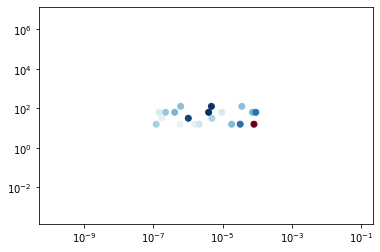

In [25]:
trial_coords = np.zeros((len(study.trials),2))

trial_metrics = np.zeros((len(study.trials)))

for trial_i, trial in enumerate(study.trials):
    par_i = 0
    for par_name in trial.params:
        trial_coords[trial_i, par_i] = trial.params[par_name]
        trial_metrics[trial_i] = trial.value
        par_i +=1

#fig, ax = plt.figure()
#ax.scatter(trial_coords[:,0], trial_coords[:,1], c=trial_metrics, cmap="RdBu")

#ax.set_scale("log")

plt.xscale("log")
plt.yscale("log")
plt.scatter(trial_coords[:,0], trial_coords[:,1], c=trial_metrics, cmap="RdBu")

In [26]:
for hpar in study.best_params:
#for hpar in best_params:
    print(hpar)
    hyper_parameters[hpar] = study.best_params[hpar]
    #hyper_parameters[hpar] = best_params[hpar]
print(hyper_parameters)

lr
bs
{'name': 'CustomNet', 'cnn_struct': [{'type': <class 'circ_padding.AsymmetricCircularPadding'>, 'layer_pars': {'padding': [0, 1, 1]}}, {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 4, 'out_channels': 64, 'kernel_size': [2, 2], 'stride': [1, 1], 'bias': True}}, {'type': <class 'torch.nn.modules.activation.ReLU'>, 'layer_pars': {}}, {'type': <class 'circ_padding.AsymmetricCircularPadding'>, 'layer_pars': {'padding': [0, 1, 1]}}, {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 64, 'out_channels': 64, 'kernel_size': [2, 2], 'stride': [1, 1], 'bias': True}}, {'type': <class 'torch.nn.modules.activation.ReLU'>, 'layer_pars': {}}, {'type': <class 'circ_padding.AsymmetricCircularPadding'>, 'layer_pars': {'padding': [0, 1, 1]}}, {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'layer_pars': {'in_channels': 64, 'out_channels': 64, 'kernel_size': [2, 2], 'stride': [1, 1], 'bias': True}}, {'type': <class 'torch.nn.modules.activa

In [27]:
hyper_parameters["cnn_struct"]

[{'type': circ_padding.AsymmetricCircularPadding,
  'layer_pars': {'padding': [0, 1, 1]}},
 {'type': torch.nn.modules.conv.Conv2d,
  'layer_pars': {'in_channels': 4,
   'out_channels': 64,
   'kernel_size': [2, 2],
   'stride': [1, 1],
   'bias': True}},
 {'type': torch.nn.modules.activation.ReLU, 'layer_pars': {}},
 {'type': circ_padding.AsymmetricCircularPadding,
  'layer_pars': {'padding': [0, 1, 1]}},
 {'type': torch.nn.modules.conv.Conv2d,
  'layer_pars': {'in_channels': 64,
   'out_channels': 64,
   'kernel_size': [2, 2],
   'stride': [1, 1],
   'bias': True}},
 {'type': torch.nn.modules.activation.ReLU, 'layer_pars': {}},
 {'type': circ_padding.AsymmetricCircularPadding,
  'layer_pars': {'padding': [0, 1, 1]}},
 {'type': torch.nn.modules.conv.Conv2d,
  'layer_pars': {'in_channels': 64,
   'out_channels': 64,
   'kernel_size': [2, 2],
   'stride': [1, 1],
   'bias': True}},
 {'type': torch.nn.modules.activation.ReLU, 'layer_pars': {}},
 {'type': torch.nn.modules.pooling.AdaptiveA

In [28]:
checkpoint_path = "pl_checkpoints/CustomNet-003-epoch=178-val_loss=1.51679E-08.ckpt"

In [29]:
#best_model = custom_torch_net_class_lightning.CustomNet.load_from_checkpoint(checkpoint_path,hyper_parameters)
best_model = custom_torch_net_class_lightning.CustomNet.load_from_checkpoint(checkpoint_path)

best_model.configure_loss()

best_model.eval()

CustomNet(
  (cnn): Net(
    (layers): ModuleList(
      (0): AsymmetricCircularPadding()
      (1): Conv2d(4, 64, kernel_size=[2, 2], stride=[1, 1])
      (2): ReLU()
      (3): AsymmetricCircularPadding()
      (4): Conv2d(64, 64, kernel_size=[2, 2], stride=[1, 1])
      (5): ReLU()
      (6): AsymmetricCircularPadding()
      (7): Conv2d(64, 64, kernel_size=[2, 2], stride=[1, 1])
      (8): ReLU()
      (9): AdaptiveAvgPool2d(output_size=[1, 1])
      (10): ReLU()
    )
  )
  (dense1): Net(
    (layers): ModuleList(
      (0): Reshape()
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=1, bias=True)
      (3): Sigmoid()
    )
  )
  (loss): BCELoss()
)

In [30]:
best_model.to(device)

CustomNet(
  (cnn): Net(
    (layers): ModuleList(
      (0): AsymmetricCircularPadding()
      (1): Conv2d(4, 64, kernel_size=[2, 2], stride=[1, 1])
      (2): ReLU()
      (3): AsymmetricCircularPadding()
      (4): Conv2d(64, 64, kernel_size=[2, 2], stride=[1, 1])
      (5): ReLU()
      (6): AsymmetricCircularPadding()
      (7): Conv2d(64, 64, kernel_size=[2, 2], stride=[1, 1])
      (8): ReLU()
      (9): AdaptiveAvgPool2d(output_size=[1, 1])
      (10): ReLU()
    )
  )
  (dense1): Net(
    (layers): ModuleList(
      (0): Reshape()
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=1, bias=True)
      (3): Sigmoid()
    )
  )
  (loss): BCELoss()
)

In [31]:
#best_model.prepare_dataset_splits(dataset, split_indices)

In [ ]:
"""
Load Test Data
"""
net = best_model
net.eval()
print(f"test dataset size: {len(test_indices)}")
#lat_size = [10,200]
input_size = net.input_size
output_size = net.output_size
model_input_shape = tuple(np.concatenate(([-1],input_size)))
print(model_input_shape)

#net_outputs = np.zeros( (len(test_indices)) )
net_outputs = np.zeros( (len(test_indices), len(output_attributes)) )
#labels = np.zeros( (len(test_indices)) )
labels = np.zeros( (len(test_indices), len(output_attributes)) )
mus = np.zeros( (len(test_indices)) )
with torch.no_grad():
    for i in tqdm(range(len(test_indices))):
    #for i in tqdm(range(len(val_indices))):

        test_index = test_indices[i]
        conf_lat_links, label = dataset[test_index]
        batch_conf_lat_links = torch.zeros(1, *conf_lat_links.size())
        batch_conf_lat_links[0] = conf_lat_links
        mus[i] = dataset.data[test_index]["mu"]
        #net_outputs[i] = net(conf_lat_links.view(model_input_shape).to(device).float()).detach().cpu().numpy()
        #net_outputs[i] = net(conf_lat_links.to(device).float()).detach().cpu().numpy()
        net_outputs[i] = net(batch_conf_lat_links.to(device).float()).detach().cpu().numpy()
        #output = net(conf_lat_links.view(model_input_shape).float())
        #labels[i] = label.detach().cpu().numpy()
        labels[i] = np.array(label)
  

In [48]:
dev = np.abs(net_outputs - labels)
print(dev.sum())

0.09039289676573191


In [50]:
int_net_outputs = np.rint(net_outputs)
int_dev = np.abs(int_net_outputs - labels.astype(int))
print(int_dev.sum())

0.0


In [47]:
pd.DataFrame(dev).describe()

,0
count,1.792000e+05
mean,5.044246e-07
std,1.415703e-04
min,0.000000e+00
25%,0.000000e+00
50%,6.521377e-21
75%,1.596102e-10
max,5.696440e-02


In [46]:
pd.DataFrame(int_dev).describe()

,0
count,179200.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
"""
Load Data
"""
#conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Multi_lattice_open_worms/openx_test1.npy"
#conf_file_dir = "/media/data/sbulusu/datasets/complexworm/Multi_lattice_closed_worms/x_test1"
conf_file_dir = "/media/data/sbulusu/datasets/complexworm/"
#file_format_list = ["Multi_lattice_open_worms/openx_test*.npy",
#                    "Multi_lattice_closed_worms/x_test*.npy"]
#file_format_list = ["Multi_lattice_open_worms/openx_test1.npy",
#                    "Multi_lattice_open_worms/openx_test2.npy",
#                    "Multi_lattice_closed_worms/x_test1.npy",
#                    "Multi_lattice_closed_worms/x_test2.npy"]
file_format_list = ["Multi_lattice_open_worms/openx_test2.npy",
                    "Multi_lattice_closed_worms/x_test2.npy"]

label_names = ["n", "phi2"]
labels_in_file_name = ["mu", "phase", "open"]

test_dataset = open_worm_lat_dataset_load_new_lightning.kl_dataset(conf_file_dir,
                                                    file_format_list,
                                                    label_names, labels_in_file_name,
                                                    transform=None)

target_attributes = ["open"]
output_attributes = target_attributes


test_dataset.train_label_names = target_attributes

In [ ]:
test_dataset[0][0]

In [ ]:
test_dataset[0]

In [ ]:
best_model.dataset = test_dataset
best_model.test_sampler = torch.utils.data.SequentialSampler(test_dataset)
best_model.hparams['bs'] = 128

In [ ]:
#test_trainer = pl.Trainer(gpus=1)
#test_trainer.test(best_model)

In [ ]:
outputs = torch.zeros(len(test_dataset))
labels = torch.zeros(len(test_dataset))
with torch.no_grad():
    for test_ex_i in tqdm(range(len(test_dataset))):
    #for test_ex_i in tqdm(range(0,10)):
        conf, label = test_dataset[test_ex_i]
        batch_conf = torch.zeros(1,*conf.size())
        #print(conf.size())
        #print(batch_conf.size())
        batch_conf[0] = conf
        #outputs[test_ex_i] = best_model(conf)
        #outputs[test_ex_i] = best_model(batch_conf.to(device))
        outputs[test_ex_i] = best_model(batch_conf.to(device)).detach().cpu()
        #outputs[test_ex_i] = best_model(batch_conf).detach().cpu()

        labels[test_ex_i] = label

In [ ]:
dev = torch.abs(outputs - labels).sum()
print(dev)

In [ ]:
test_df = pd.DataFrame([outputs, label])
test_df.describe()

In [ ]:
print(f"lat_size {lat_size}")
for i in range(len(target_attributes)):
    print(f"MSE {target_attributes[i]}")
    print(np.mean( abs((labels[:,i]-net_outputs[:,i])**2) ))

In [ ]:
unique_mus = np.unique(mus)
num_mus = len(unique_mus)

In [ ]:
##save the observable values in a dictionary
obs_mu_dict = {}
for target_name in target_attributes:
    obs_mu_dict[target_name] = {"label" : [],"pred" : []}

In [ ]:

obs_label = []
obs_pred = []
for mu_val in unique_mus:
    mu_loc = np.where(mus == mu_val)[0]
    obs_label_mu = np.array(labels[mu_loc,0])
    obs_pred_mu = np.array(net_outputs[mu_loc,0])
    
    obs_label.append(obs_label_mu)    
    obs_pred.append(obs_pred_mu)

    

In [ ]:
##to be able to plot the observables against mu, they have to be sorted with respect to it
for mu_val in unique_mus:
    ##find which examples have a particular mu value (mu_val)
    mu_loc = np.where(mus == mu_val)[0]
    ##find the labels and prediction of observables which correspond to these examples
    obs_label_mu_val = labels[mu_loc]
    obs_pred_mu_val = net_outputs[mu_loc]
    for target_i, target_name in enumerate(target_attributes):
        
        obs_label_mu = np.array(labels[mu_loc,target_i])
        obs_pred_mu = np.array(net_outputs[mu_loc,target_i])
        
        obs_mu_dict[target_name]["label"].append(obs_label_mu)
        obs_mu_dict[target_name]["pred"].append(obs_pred_mu)

        
        
        
for target_i, target_name in enumerate(target_attributes):
    obs_mu_dict[target_name]["label"] = np.array(obs_mu_dict[target_name]["label"])
    obs_mu_dict[target_name]["pred"] = np.array(obs_mu_dict[target_name]["pred"])

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_target = "phi2"

obs_label = np.array(obs_mu_dict[plot_target]["label"])
obs_pred = np.array(obs_mu_dict[plot_target]["pred"])

mean_obs_label = np.zeros(len(obs_label))
std_obs_label = np.zeros(len(obs_label))

mean_obs_pred = np.zeros(len(obs_pred))
std_obs_pred = np.zeros(len(obs_pred)) 

for i in range(len(obs_label)):
    mean_obs_label[i] = np.mean(obs_label[i])
    std_obs_label[i] = np.std(obs_label[i])
    
    mean_obs_pred[i] = np.mean(obs_pred[i])
    std_obs_pred[i] = np.std(obs_pred[i])
    
#plt.scatter(unique_mus, mean_obs_label, c="g")
#plt.scatter(unique_mus, mean_obs_pred, c="r")
    
plt.errorbar(unique_mus, mean_obs_label, yerr=std_obs_label, color="g", label="ϕ² label")
plt.errorbar(unique_mus, mean_obs_pred, yerr=std_obs_pred, color="r", label="ϕ² prediction")
plt.legend(loc="upper left")
plt.savefig("phi2_mu" + str(lat_size))

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

plot_target = "n"

obs_label = np.array(obs_mu_dict[plot_target]["label"])
obs_pred = np.array(obs_mu_dict[plot_target]["pred"])

mean_obs_label = np.zeros(len(obs_label))
std_obs_label = np.zeros(len(obs_label))

mean_obs_pred = np.zeros(len(obs_pred))
std_obs_pred = np.zeros(len(obs_pred)) 

for i in range(len(obs_label)):
    mean_obs_label[i] = np.mean(obs_label[i])
    std_obs_label[i] = np.std(obs_label[i])
    
    mean_obs_pred[i] = np.mean(obs_pred[i])
    std_obs_pred[i] = np.std(obs_pred[i])
    
#plt.scatter(unique_mus, mean_obs_label, c="g")
#plt.scatter(unique_mus, mean_obs_pred, c="r")
    
plt.errorbar(unique_mus, mean_obs_label, yerr=std_obs_label, color="g", label="n label")
plt.errorbar(unique_mus, mean_obs_pred, yerr=std_obs_pred, color="r", label="n prediction")
plt.legend(loc="upper left")
plt.savefig("n_mu" + str(lat_size))

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

target_i = 0

x_max = np.max(labels[:,target_i])
x_min = np.min(labels[:,target_i])


#plt.scatter(labels[:,target_i], net_outputs[:,target_i], c="r", label="model")
plt.scatter(labels[:,target_i], net_outputs[:,target_i], c=mus, label="model")
plt.plot([x_min, x_max], [x_min, x_max], linestyle="--", color="b", label="(ideal)")
plt.xlabel("ϕ² label")
plt.ylabel("ϕ² predicted")
plt.legend(loc="upper left")
#plt.show()
plt.savefig("phi2_label_pred" + str(lat_size)) 


In [ ]:
len(unique_mus)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]

target_i = 1

x_max = np.max(labels[:,target_i])
x_min = np.min(labels[:,target_i])


#plt.scatter(labels[:,target_i], net_outputs[:,target_i], c="r", label="model")
plt.scatter(labels[:,target_i], net_outputs[:,target_i], c=mus, label="model")
plt.plot([x_min, x_max], [x_min, x_max], linestyle="--", color="b", label="(ideal)")
plt.xlabel("n label")
plt.ylabel("n predicted")
plt.legend(loc="upper left")
#plt.show()
plt.savefig("n_label_pred" + str(lat_size)) 